In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium
from folium.plugins import HeatMap
import plotly.express as px
import warnings
pd.options.mode.chained_assignment = None

# Define the dtype_dict dictionary
dtype_dict = {
    'transit_timestamp': 'object',
    'transit_mode' : 'object',
    'station_complex_id' : 'object',
    'station_complex' : 'object',
    'borough' : 'object',
    'payment_method': 'object',
    'fare_class_category' : 'object',
    'ridership' : 'int',
    'transfers' : 'int',
    'latitude' : 'float',
    'longitude' : 'float',
    'Georeference' : 'string'
}

data = pd.read_csv("/Users/esra/Desktop/data_mta/MTA_Subway_Hourly_Ridership__Beginning_February_2022_20240501 2.csv", dtype=dtype_dict,index_col=False)         

# Assuming 'filtered_data' is your filtered DataFrame
data.to_csv('data.csv', index=False)

In [42]:
data.columns = data.columns.str.strip()

In [43]:
data.dtypes

transit_timestamp              object
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference           string[python]
dtype: object

In [44]:
data.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,04/01/2023 12:00:00 AM,subway,28,Union St (R),Brooklyn,metrocard,Metrocard - Full Fare,9,0,40.677315,-73.983109,POINT (-73.98310852050781 40.67731475830078)
1,04/01/2023 12:00:00 AM,subway,28,Union St (R),Brooklyn,metrocard,Metrocard - Other,6,0,40.677315,-73.983109,POINT (-73.98310852050781 40.67731475830078)
2,04/01/2023 12:00:00 AM,subway,28,Union St (R),Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6,0,40.677315,-73.983109,POINT (-73.98310852050781 40.67731475830078)
3,04/01/2023 12:00:00 AM,subway,28,Union St (R),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,0,40.677315,-73.983109,POINT (-73.98310852050781 40.67731475830078)
4,04/01/2023 12:00:00 AM,subway,28,Union St (R),Brooklyn,metrocard,Metrocard - Unlimited 7-Day,14,0,40.677315,-73.983109,POINT (-73.98310852050781 40.67731475830078)


In [45]:
#Extracting Weekday and Hour from Transit Timestamps
data['transit_timestamp'] = pd.to_datetime(data['transit_timestamp'])
data['weekday'] = data['transit_timestamp'].dt.day_name()
data['hour'] = data['transit_timestamp'].dt.hour

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/1439142088.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [46]:
#Find the all unique values in transit_mode column
data.transit_mode.unique()

array(['subway', 'staten_island_railway', 'tram'], dtype=object)

In [47]:
#Removing Unnecessary Columns
data.drop(['latitude','station_complex_id', 'longitude', 'Georeference','payment_method','fare_class_category','transfers'], axis=1, inplace=True)
#Find the all unique values in transit_mode column
data.transit_mode.unique()
#Filter the data to include only rows where the "transit_mode" column has the value "subway"
data = data[data['transit_mode']=='subway']
#Remove the () and everything in between the () from each station_complex row in the data_copy
data['station_complex'] = data['station_complex'].str.replace(r'\(.*\)', '', regex=True)# Check for missing values
#Check for missing values
data.isnull().sum()


transit_timestamp    0
transit_mode         0
station_complex      0
borough              0
ridership            0
weekday              0
hour                 0
dtype: int64

In [48]:
#remove the () and everything in between the () from each station_complex row in the data_copy
data['station_complex'] = data['station_complex'].str.replace(r'\(.*\)', '', regex=True)
data.head()

,transit_timestamp,transit_mode,station_complex,borough,ridership,weekday,hour
0,2023-04-01,subway,Union St,Brooklyn,9,Saturday,0
1,2023-04-01,subway,Union St,Brooklyn,6,Saturday,0
2,2023-04-01,subway,Union St,Brooklyn,6,Saturday,0
3,2023-04-01,subway,Union St,Brooklyn,1,Saturday,0
4,2023-04-01,subway,Union St,Brooklyn,14,Saturday,0


In [50]:
# Grouped transit time, station, station id, ridership & sorted ridership from largest to smallest.
station_ridership = data.groupby('station_complex',)['ridership'].sum().sort_values( ascending = False)
station_ridership.head(10)

station_complex
Times Sq-42 St          11098829
34 St-Penn Station       8086294
Grand Central-42 St      7829750
86 St                    6674850
34 St-Herald Sq          6035466
14 St                    5990013
23 St                    5736208
14 St-Union Sq           5573032
Fulton St                4958474
72 St                    4701693
Name: ridership, dtype: int64

In [51]:
#Grouping and Summarizing Data
boroughs_ridership = data.groupby('borough')['ridership'].sum().reset_index()
#Creating a Bar Chart
fig = px.bar(boroughs_ridership, x='borough', y='ridership',
             labels={'borough': 'Borough', 'ridership': 'Ridership'},
             color_continuous_scale='Blues', # Use a blue gradient color scale
             title='Subway Ridership by Borough',
             color='ridership')
# We update the layout of the chart to specify the sorting order of the boroughs based on total ridership.
# The y-axis title is set to "Total Ridership", providing clarity on the data represented on the y-axis.
# Similarly, the x-axis title is set to "Borough" for clarity.
# Finally, we center the title of the graph horizontally for aesthetic appeal.
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  yaxis_title='Total Ridership',
                  xaxis_title='Borough',
                  title_x=0.5, width=1200,height=800,)
fig.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/2581826635.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




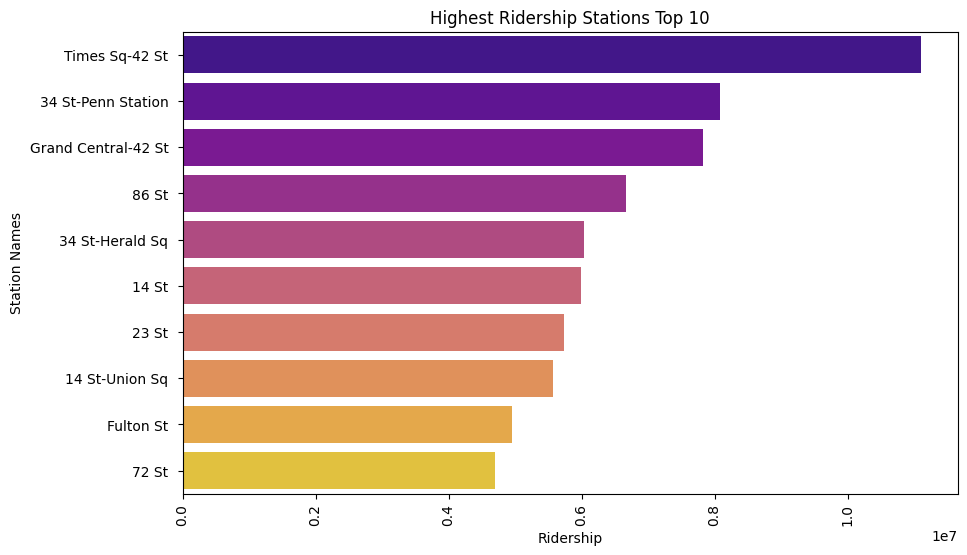

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'station_complex' and 'ridership' columns

# Take the top 10 stations with the highest ridership
# Sort them in descending order from highest to lowest
top_stations = data.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stations
plt.figure(figsize=(10, 6))
sns.barplot(y=top_stations.index, x=top_stations.values, palette="plasma")

plt.ylabel('Station Names')
plt.xlabel('Ridership')
plt.title('Highest Ridership Stations Top 10')
plt.xticks(rotation=90)
plt.show()


In [53]:
top_stations.index

Index(['Times Sq-42 St ', '34 St-Penn Station ', 'Grand Central-42 St ',
       '86 St ', '34 St-Herald Sq ', '14 St ', '23 St ', '14 St-Union Sq ',
       'Fulton St ', '72 St '],
      dtype='object', name='station_complex')

In [54]:
female_population = {
    'Brooklyn': 1346556,
    'Queens': 1162064,
    'Manhattan': 829162,
    'Bronx': 718540
}

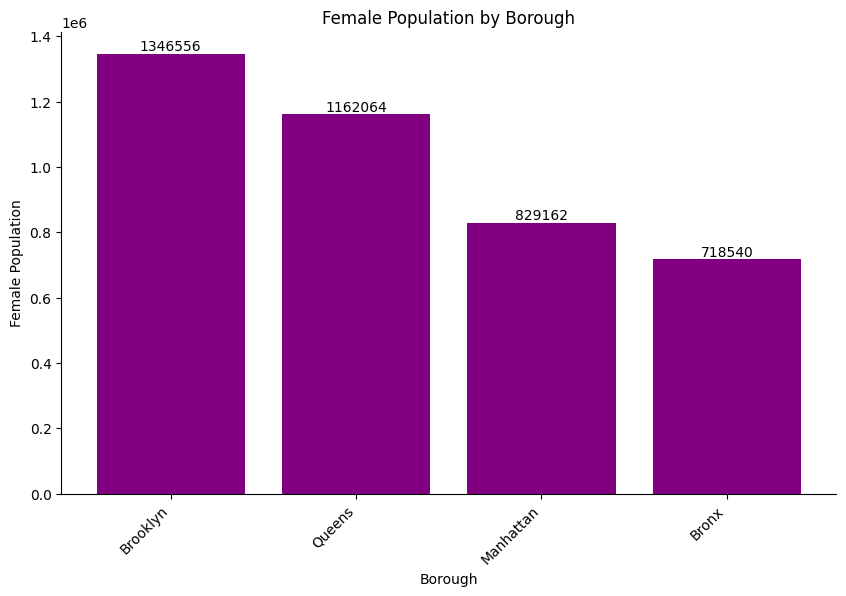

In [55]:
import matplotlib.pyplot as plt

#Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(female_population.keys(), female_population.values(),color='purple')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

#Add labels and title
plt.xlabel('Borough')
plt.ylabel('Female Population')

plt.title('Female Population by Borough')

# Get the current axis
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Display the plot
plt.show()

In [56]:
income = {
    'Manhattan': 99880,
    'Bronx': 47036,
    'Queens': 82431,
    'Brooklyn': 74692
}

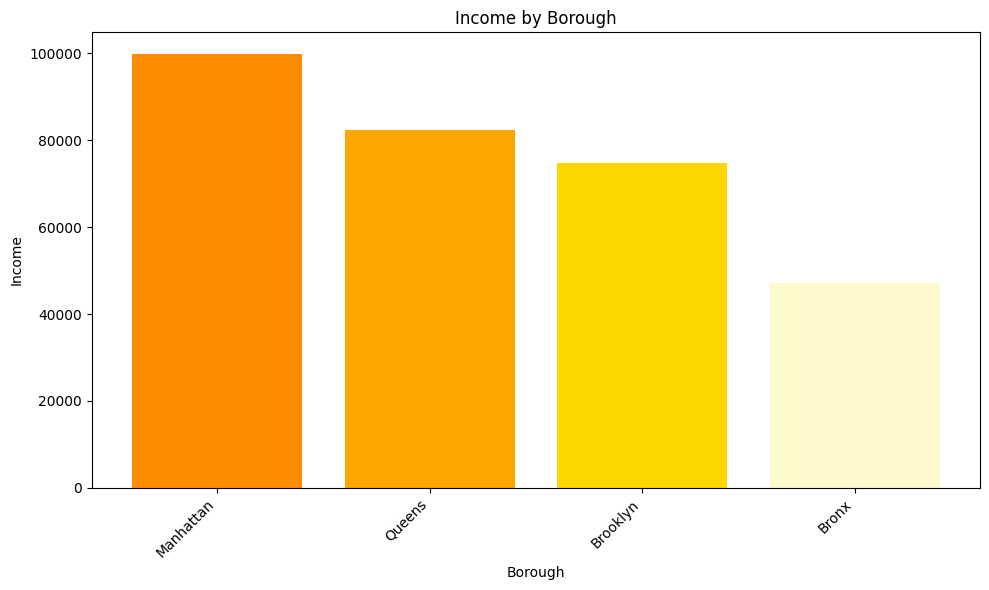

In [57]:
# Sort the income data in descending order of values
sorted_income = dict(sorted(income.items(), key=lambda item: item[1], reverse=True))

# Define colors for each bar
colors = ['darkorange', 'orange', 'gold', 'lemonchiffon']

# Create a bar plot with sorted data
plt.figure(figsize=(10, 6))
plt.bar(sorted_income.keys(), sorted_income.values(), color=colors)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Income')
plt.title('Income by Borough')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


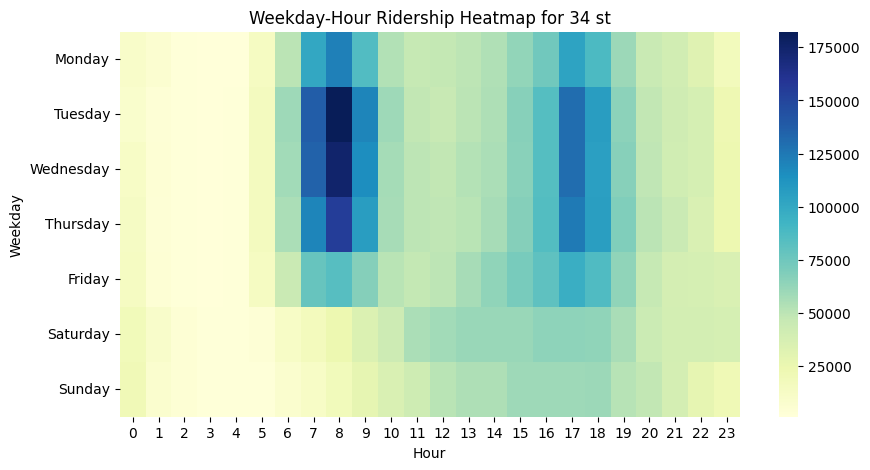

In [58]:
# Filter the DataFrame to include only '34 St-Penn Station ' station
data_34st = data[data['station_complex'] == '34 St-Penn Station ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_34st['weekday'] = data_34st['transit_timestamp'].dt.day_name()
data_34st['hour'] = data_34st['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_34st.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Heatmap için pivot table oluştur
pivot = weekday_hour_ridership.pivot(index='weekday', columns='hour', values='ridership')

## Heatmap çiz
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')

# Grafik başlığını ekle
plt.title('Weekday-Hour Ridership Heatmap for 34 st')

# Grafik göster
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/1019905762.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



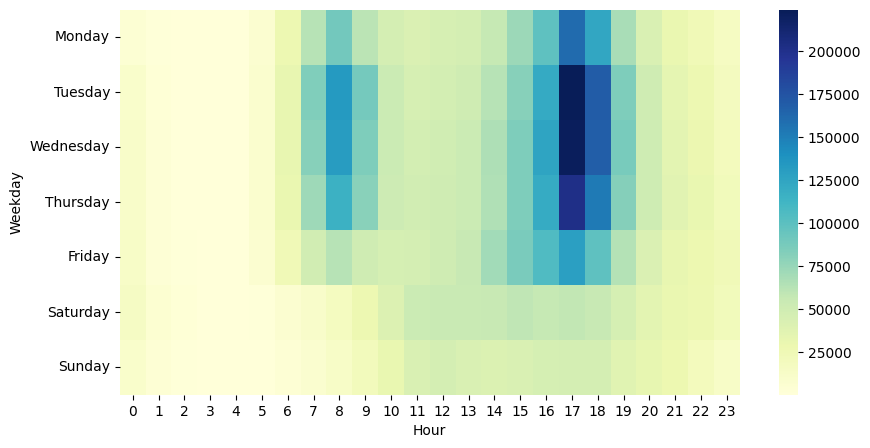

In [59]:
# Filter the DataFrame to include only 'Grand Central-42 St ' station
data_grand = data[data['station_complex'] == 'Grand Central-42 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_grand['weekday'] = data_grand['transit_timestamp'].dt.day_name()
data_grand['hour'] = data_grand['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_grand.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/370839762.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



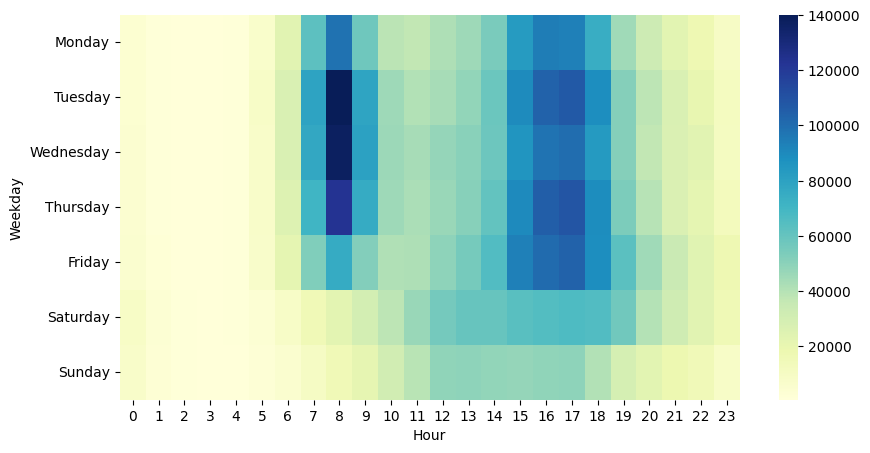

In [60]:
# Filter the DataFrame to include only '86 St  ' station
data_86 = data[data['station_complex'] == '86 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_86['weekday'] = data_86['transit_timestamp'].dt.day_name()
data_86['hour'] = data_86['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_86.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/379156111.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



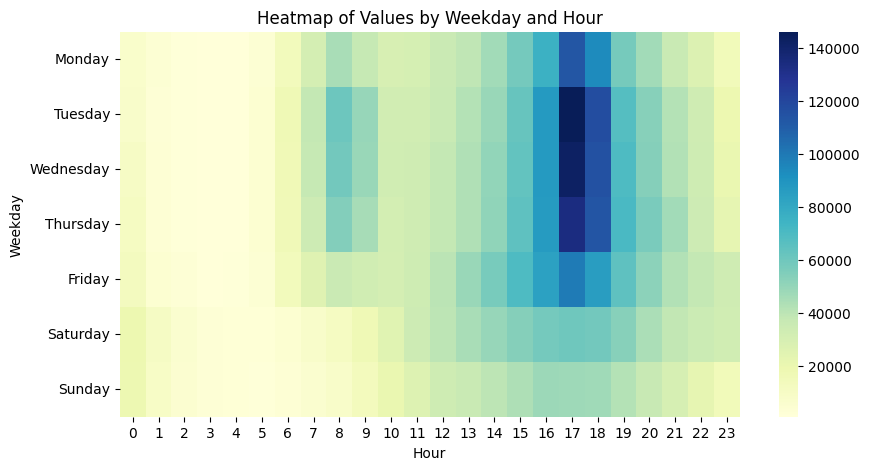

In [61]:
# Filter the DataFrame to include only '34 St-Herald Sq     ' station
data_34 = data[data['station_complex'] == '34 St-Herald Sq ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_34['weekday'] = data_34['transit_timestamp'].dt.day_name()
data_34['hour'] = data_34['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_34.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/1074124230.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



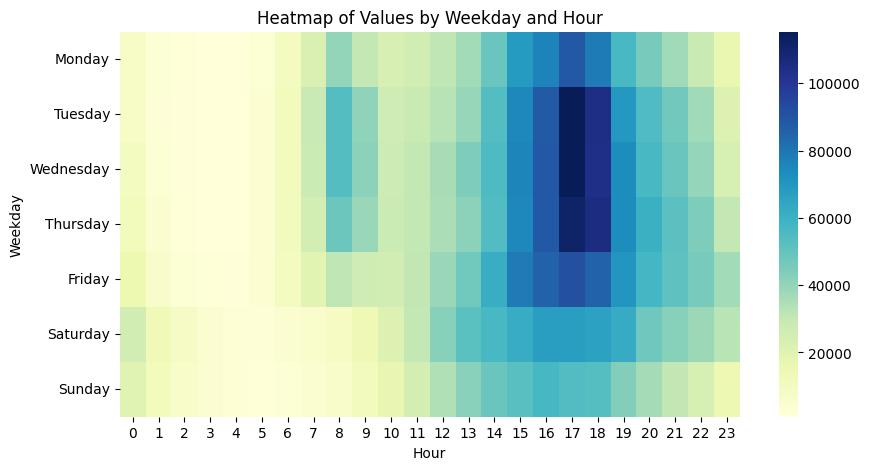

In [63]:
# Filter the DataFrame to include only '14 ST' station
data_14 = data[data['station_complex'] == '14 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_14['weekday'] = data_14['transit_timestamp'].dt.day_name()
data_14['hour'] = data_14['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_14.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/3032336830.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



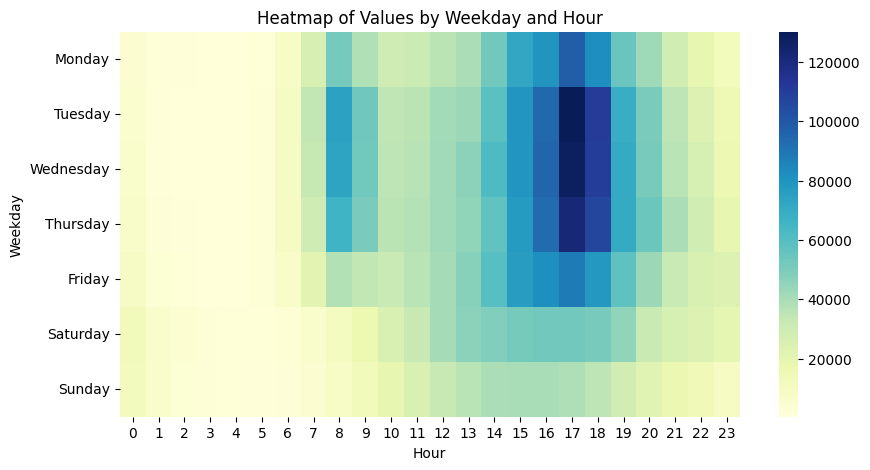

In [66]:
# Filter the DataFrame to include only '14 ST' station
data_23 = data[data['station_complex'] ==  '23 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_23['weekday'] = data_23['transit_timestamp'].dt.day_name()
data_23['hour'] = data_23['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_23.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/3274289911.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



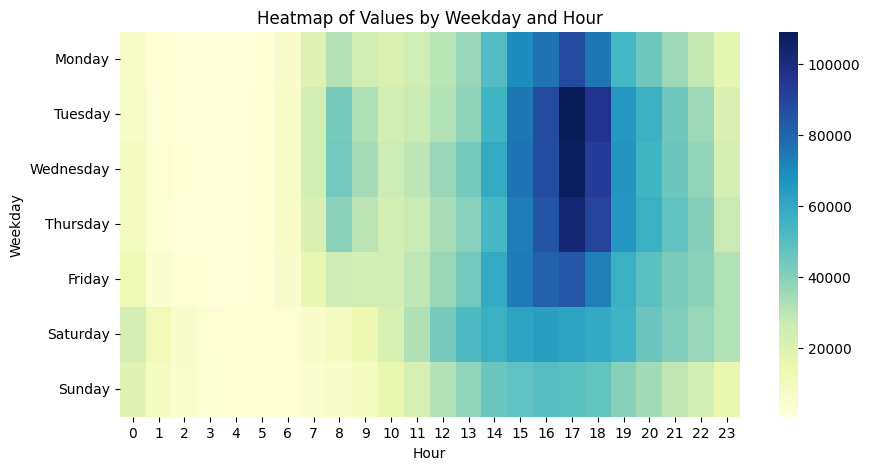

In [67]:
# Filter the DataFrame to include only '14 St-Union Sq ' station
data_union = data[data['station_complex'] ==  '14 St-Union Sq ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_union['weekday'] = data_union['transit_timestamp'].dt.day_name()
data_union['hour'] = data_union['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_union.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/4287416835.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



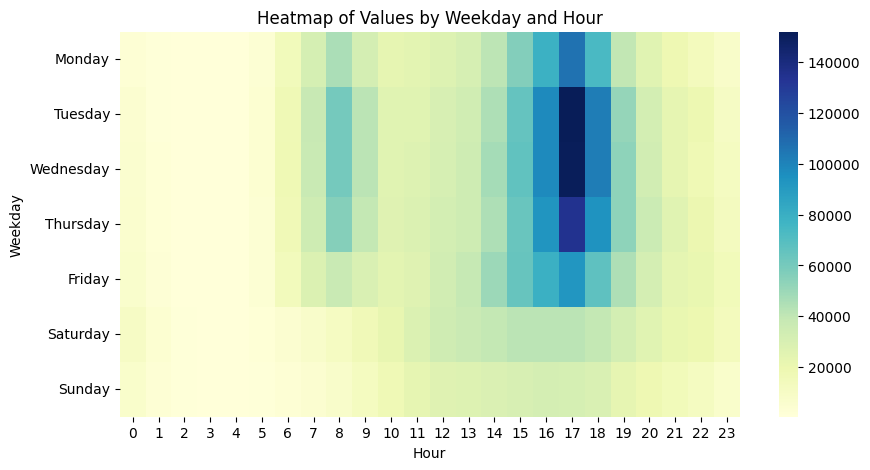

In [68]:
# Filter the DataFrame to include only 'Fulton St ' station
data_fulton = data[data['station_complex'] ==  'Fulton St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_fulton['weekday'] = data_fulton['transit_timestamp'].dt.day_name()
data_fulton['hour'] = data_fulton['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_fulton.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/3058692163.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



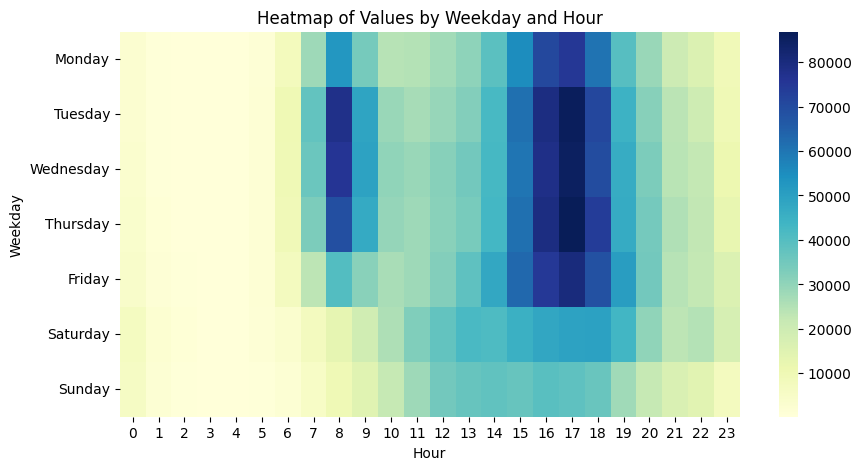

In [69]:
# Filter the DataFrame to include only  '72 St ' station
data_72 = data[data['station_complex'] ==   '72 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_72['weekday'] = data_72['transit_timestamp'].dt.day_name()
data_72['hour'] = data_72['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_72.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

In [99]:
# Filter the data to include only Brooklyn
brooklyn_data = data[data['borough'] == 'Brooklyn']

# Group by station and sum the ridership
brooklyn_ridership = brooklyn_data.groupby('station_complex')['ridership'].sum().sort_values(ascending=False).head(5)
brooklyn_ridership.head(5)

station_complex
Atlantic Av-Barclays Ctr     2517640
Bedford Av                   2308989
Church Av                    1928904
Jay St-MetroTech             1889323
DeKalb Av                    1864449
Name: ridership, dtype: int64

In [100]:
brooklyn_ridership.index

Index(['Atlantic Av-Barclays Ctr ', 'Bedford Av ', 'Church Av ',
       'Jay St-MetroTech ', 'DeKalb Av '],
      dtype='object', name='station_complex')

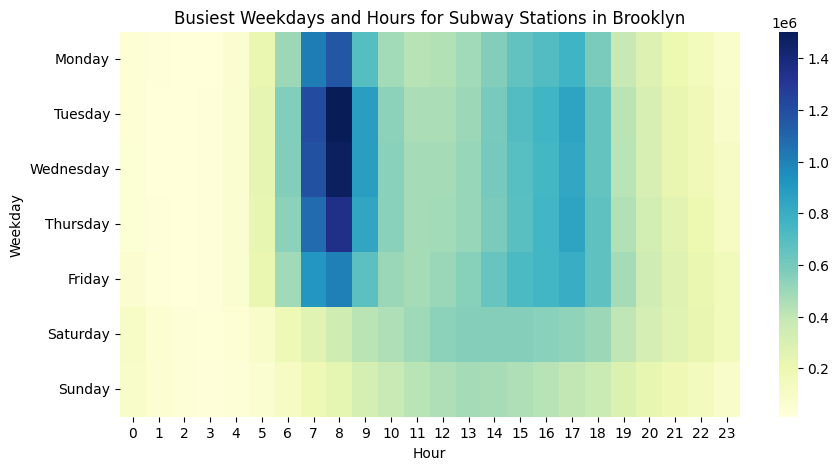

In [95]:
# Extract weekday and hour from transit_timestamp
brooklyn_data['weekday'] = brooklyn_data['transit_timestamp'].dt.day_name()
brooklyn_data['hour'] = brooklyn_data['transit_timestamp'].dt.hour

# Group by weekday and hour, sum ridership, and pivot the data
pivot_table = brooklyn_data.pivot_table(index='weekday', columns='hour', values='ridership', aggfunc='sum')

# Reorder weekdays for visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(weekday_order)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Busiest Weekdays and Hours for Subway Stations in Brooklyn')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/3058692163.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



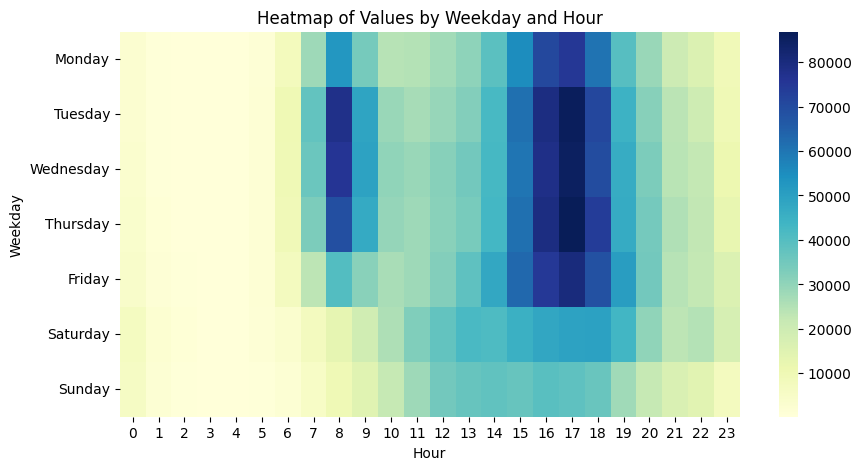

In [96]:
# Filter the DataFrame to include only  '72 St ' station
data_72 = data[data['station_complex'] ==   '72 St ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_72['weekday'] = data_72['transit_timestamp'].dt.day_name()
data_72['hour'] = data_72['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_72.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/450418107.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



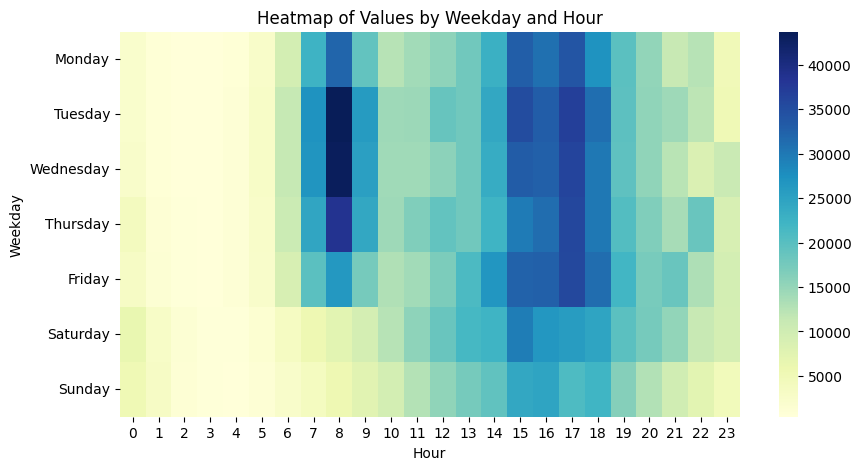

In [101]:
# Filter the DataFrame to include only  '72 St ' station
data_atlantic = data[data['station_complex'] == 'Atlantic Av-Barclays Ctr ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_atlantic['weekday'] = data_atlantic['transit_timestamp'].dt.day_name()
data_atlantic['hour'] = data_atlantic['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_atlantic.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/3164266224.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



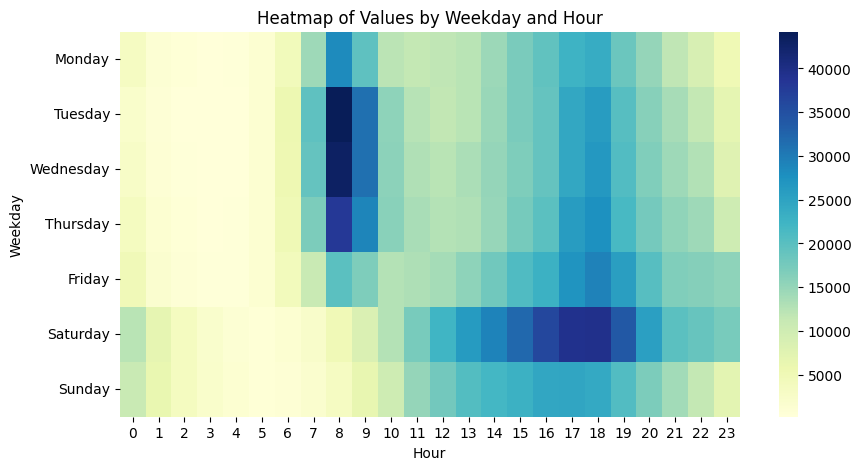

In [102]:
# Filter the DataFrame to include only  '72 St ' station
data_bedford = data[data['station_complex'] ==  'Bedford Av ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_bedford['weekday'] = data_bedford['transit_timestamp'].dt.day_name()
data_bedford['hour'] = data_bedford['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_bedford.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/1487570530.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



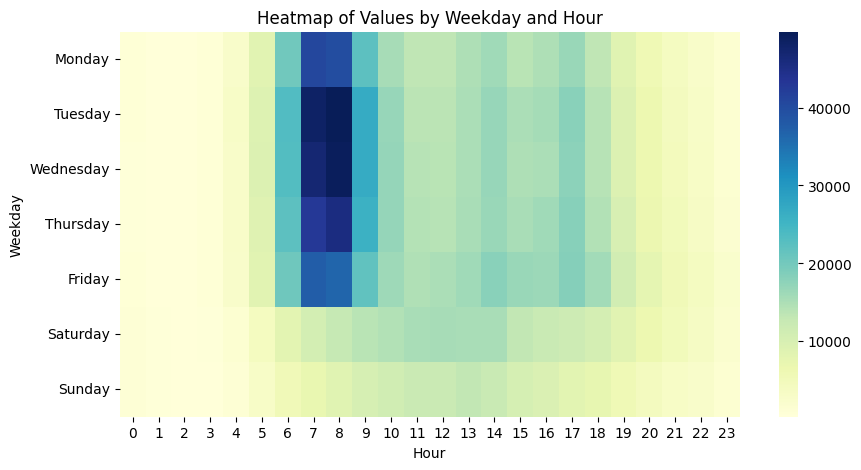

In [103]:
# Filter the DataFrame to include only  '72 St ' station
data_church = data[data['station_complex'] ==  'Church Av ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_church['weekday'] = data_church['transit_timestamp'].dt.day_name()
data_church['hour'] = data_church['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_church.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/2416494137.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



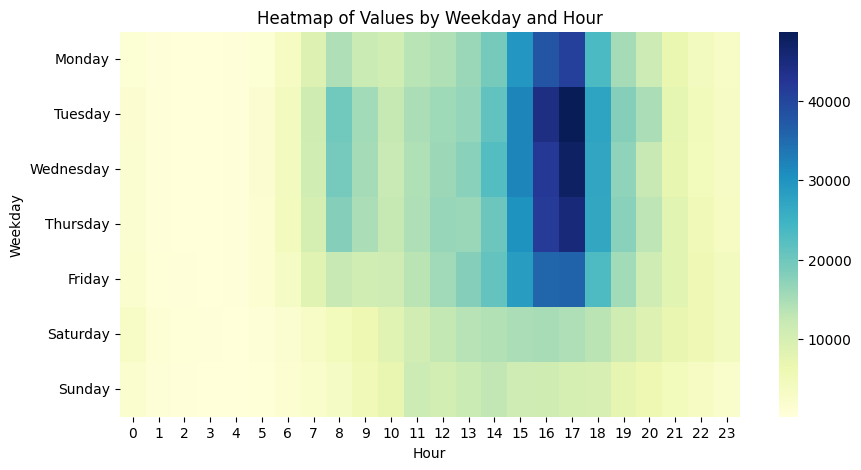

In [104]:
# Filter the DataFrame to include only  '72 St ' station
data_jay = data[data['station_complex'] ==  'Jay St-MetroTech ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_jay['weekday'] = data_jay['transit_timestamp'].dt.day_name()
data_jay['hour'] = data_jay['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_jay.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()

/var/folders/lg/dgwnwk9d0d3874nd4j_wdz080000gn/T/ipykernel_16578/985313457.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



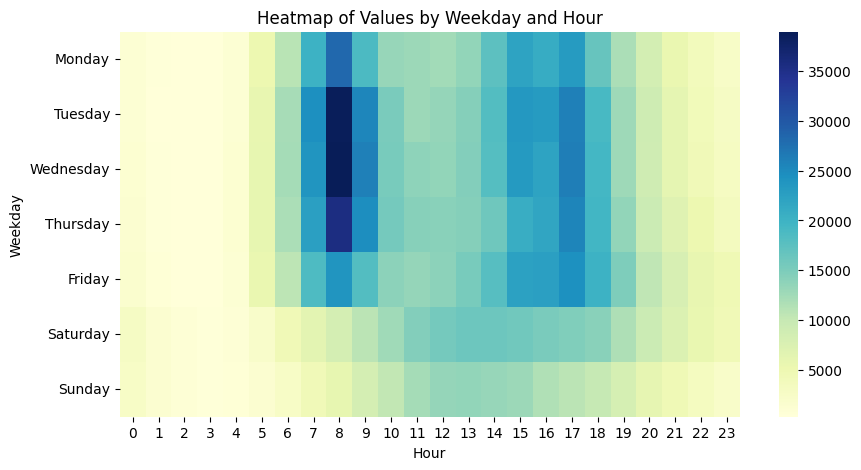

In [105]:
# Filter the DataFrame to include only  '72 St ' station
data_dekalb = data[data['station_complex'] ==  'DeKalb Av ']

# 'transit_timestamp' sütunundan haftanın günü ve saat bilgilerini çıkar
data_dekalb['weekday'] = data_dekalb['transit_timestamp'].dt.day_name()
data_dekalb['hour'] = data_dekalb['transit_timestamp'].dt.hour

# Haftanın günü ve saat verilerini grupla ve topla
weekday_hour_ridership = data_dekalb.groupby(['weekday', 'hour'])['ridership'].sum().reset_index()

# Haftanın günlerini sırala
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hour_ridership['weekday'] = pd.Categorical(weekday_hour_ridership['weekday'], categories=weekday_order, ordered=True)

# Create a pivot table
pivot = weekday_hour_ridership.pivot_table(index='weekday', columns='hour', values='ridership')

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.title('Heatmap of Values by Weekday and Hour')
plt.show()